In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [3]:
data = pd.read_csv('data_for_regression.csv')

In [16]:
data_test = pd.read_csv('test_features.csv')

In [5]:
data = data.drop('Unnamed: 0',1)
data = data.drop('timestamp',1)

In [21]:
list_X = list(data)

In [22]:
list_y = [
 'B_C2H6',
 'B_C3H8',
 'B_iC4H10',
 'B_nC4H10']

In [23]:
for i in list_y:
    list_X.remove(i)
        
print(list_X)

['A_rate', 'A_CH4', 'A_C2H6', 'A_C3H8', 'A_iC4H10', 'A_nC4H10', 'A_iC5H12', 'A_nC5H12', 'A_C6H14', 'B_rate']


In [24]:
X = data[list_X]
y = data[list_y]

In [30]:
y

,B_C2H6,B_C3H8,B_iC4H10,B_nC4H10
0,4.532649,38.604149,17.238489,24.275393
1,4.578543,38.510623,17.193441,24.242152
2,4.642879,39.124029,17.301609,24.211492
3,4.549837,38.247333,17.118282,24.044074
4,4.556611,37.985776,17.038811,23.931490
...,...,...,...,...
4644,4.816865,35.539156,16.269938,24.770377
4645,4.993286,36.067750,16.317757,24.729847
4646,5.101574,36.275040,16.295460,24.629889
4647,5.210675,36.872917,16.336359,24.438236


In [34]:
reg = LinearRegression().fit(X, y)

In [35]:
y_train_predict = reg.predict(X)

In [36]:
R_sq = r2_score(y, y_train_predict)

In [37]:
R_sq

0.298469150636239

In [38]:
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(y, y_train_predict)

In [39]:
MSE

0.5830223795568091

In [43]:
df_y_train_predict = pd.DataFrame(y_train_predict, columns = list_y)

In [45]:
data_for_comparasing = df_y_train_predict.reset_index()

In [46]:
y = y.reset_index()

In [47]:
data_for_comparasing = data_for_comparasing.merge(y, how = 'left', on = 'index')

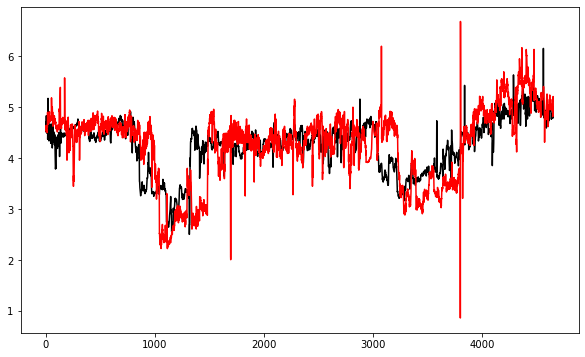

In [49]:
fig, axs = plt.subplots (figsize = (10,6))
axs.plot(data_for_comparasing['B_C2H6_x'], color = 'black') # черный график - предсказания
axs.plot(data_for_comparasing['B_C2H6_y'],  color = 'red') # красны график - факт

plt.show()

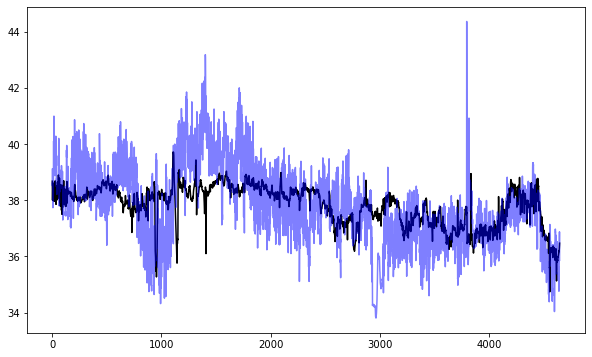

In [54]:
fig, axs = plt.subplots (figsize = (10,6))
axs.plot(data_for_comparasing['B_C3H8_x'], color = 'black') # черный график - предсказания
axs.plot(data_for_comparasing['B_C3H8_y'],  color = 'blue', alpha = 0.5) # синий график - факт

plt.show()

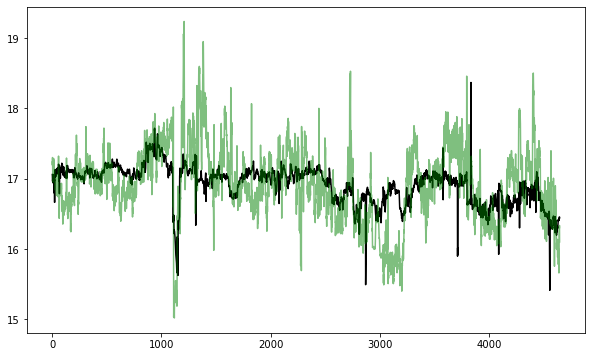

In [58]:
fig, axs = plt.subplots (figsize = (10,6))
axs.plot(data_for_comparasing['B_iC4H10_x'], color = 'black') # черный график - предсказания
axs.plot(data_for_comparasing['B_iC4H10_y'],  color = 'green', alpha = 0.5) # зеленый график - факт

plt.show()

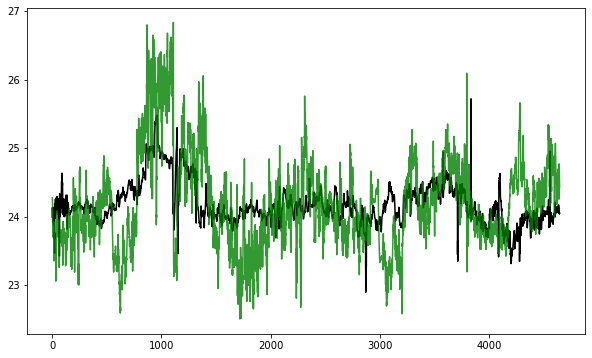

In [59]:
fig, axs = plt.subplots (figsize = (10,6))
axs.plot(data_for_comparasing['B_nC4H10_x'], color = 'black') # черный график - предсказания
axs.plot(data_for_comparasing['B_nC4H10_y'],  color = 'green', alpha = 0.8) # темно-зеленый график - факт

plt.show()